In [1]:
%reload_ext autoreload
%autoreload 2

import os
import pickle
import logging
import multiprocessing
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import jax
import jax.numpy as jnp

import arviz as az
import numpyro
from numpyro.diagnostics import hpdi

from hbmep.config import Config
from hbmep.model import functional as F
from hbmep.model.utils import Site as site

PLATFORM = "cpu"
jax.config.update("jax_platforms", PLATFORM)
numpyro.set_platform(PLATFORM)

cpu_count = multiprocessing.cpu_count() - 2
numpyro.set_host_device_count(cpu_count)
numpyro.enable_x64()
numpyro.enable_validation()

logger = logging.getLogger(__name__)


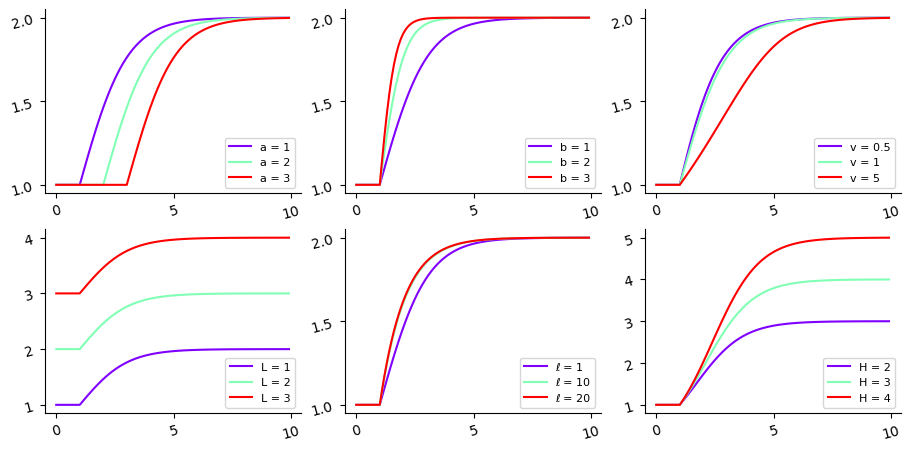

In [30]:
x = np.arange(0, 10, .1)

default = [1] * 6
params = [site.a, site.b, site.v, site.L, site.ell, site.H]
params_choices = [
    [1, 2, 3],
    [1, 2, 3],
    [.5, 1, 5],
    [1, 2, 3],
    [1, 100, 200],
    [2, 3, 4]
]
yticks = [
    [1, 1.5, 2],
    [1, 1.5, 2],
    [1, 1.5, 2],
    [1, 2, 3, 4],
    [1, 1.5, 2],
    [1, 2, 3, 4, 5]
]

nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3 * ncols, 2.2 * nrows), squeeze=False, constrained_layout=True)

counter = 0
for param_ind, param in enumerate(params):
    choices = params_choices[param_ind]

    ax = axes[counter // ncols, counter % ncols]
    choices_colors = plt.cm.rainbow(np.linspace(0, 1, len(choices)))
    for choice, color in zip(choices, choices_colors):
        args = default.copy()
        args[param_ind] = choice
        args = tuple(args)
        y = F.rectified_logistic(x, *args)
        sns.lineplot(x=x, y=y, label=f"{param} = {choice}", ax=ax, color=color)
        # y = F._rectified_logistic(x, *args)
        # sns.lineplot(x=x, y=y, ax=ax, color=color, linestyle="--")

    ax.set_yticks(yticks[param_ind])
    ax.sharex(axes[0, 0])
    ax.legend(loc="lower right", prop={"size": 8})
    counter += 1

for i in range(nrows):
    for j in range(ncols):
        ax = axes[i, j]
        sides = ['right', 'top']
        for side in sides:
            ax.spines[side].set_visible(False)
        ax.tick_params(
            axis='both',
            which='both',
            left=True,
            bottom=True,
            right=False,
            top=False,
            labelleft=True,
            labelbottom=True,
            labelright=False,
            labeltop=False,
            labelrotation=15
        )

ax = axes[0, 0]
ax.set_xticks([0, 5, 10])

dest = "/home/vishu/repos/hbmep-paper/reports/paper/figures/effect-of-varying-params.png"
fig.savefig(dest, dpi=600)
logger.info(dest)
